# Лабораторная работа №1

In [1]:
import re

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from matplotlib.axes import Axes
%matplotlib inline

In [2]:
plt.rcParams["figure.figsize"] = (18, 7)
sns.set_theme()

## 1.	Загрузите данные в ноутбук

In [3]:
df: pd.DataFrame = pd.read_excel('data/Вариант 3.xlsx', sheet_name=0, header=2, skipfooter=1)
df.head()

,№,№ школы,Класс,Пол,Номер варианта,Задания с кратким ответом,Задания с развёрнутым ответом,Устная часть,Первичный балл,Балл,Минимальный балл
0,1,152,11,М,333,----001---00---000--1-+0---,0(3)0(3)0(3)0(3)0(3),NaN,3,10,36
1,2,140,12,Ж,332,----100---01-+-000--0--1---,0(3)0(3)0(3)0(3)0(3),NaN,4,14,36
2,3,137,11,М,328,--+-010---00---101--0--1---,0(3)0(3)0(3)0(3)0(3),NaN,5,17,36
3,4,148,11,М,333,-+--000--+01---100--0--1---,0(3)0(3)0(3)0(3)0(3),NaN,5,17,36
4,5,153,11,Ж,333,-+--100---00---100-+0--1---,0(3)0(3)0(3)0(3)0(3),NaN,5,17,36


## 2.	Сделайте описательную статистику по среднему баллу

In [4]:
df['Балл'].describe()

count    1180.000000
mean       52.047458
std        14.965477
min        10.000000
25%        41.000000
50%        49.000000
75%        60.250000
max       100.000000
Name: Балл, dtype: float64

## 3.	Найдите процент учащихся, выполнивших работу ниже среднего

In [5]:
# noinspection PyUnresolvedReferences
print(f"Процент учащихся, набравших меньше среднего = "
      f"{(df['Балл'] < df['Балл'].mean()).sum() / len(df['Балл']):.2%}")

Процент учащихся, набравших меньше среднего = 56.27%


## 4.	Найти процент учащихся не сдавших экзамен

In [6]:
# noinspection PyUnresolvedReferences
print(f"Процент учащихся, не сдавших экзамен = "
      f"{(df['Балл'] < df['Минимальный балл']).sum() / len(df):.2%}")

Процент учащихся, не сдавших экзамен = 7.71%


## 5.	Постройте круговую диаграмму, показывающую распределение сдавших и не сдавших экзамен

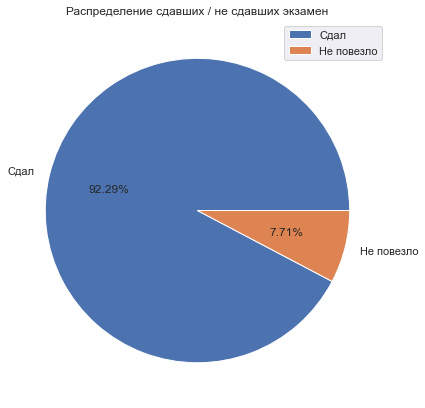

In [7]:
# noinspection PyUnresolvedReferences
s: pd.Series = (df['Балл'] >= df['Минимальный балл']).value_counts()
s.index = s.index.map({False: 'Не повезло', True: 'Сдал'})
_ = s.plot.pie(
    autopct='%1.2f%%',
    title='Распределение сдавших / не сдавших экзамен',
    legend=True,
    ylabel='',
)

## 6.	Постройте гистограмму по распределению баллов за экзамен. Соответствует ли оно нормальному распределению?

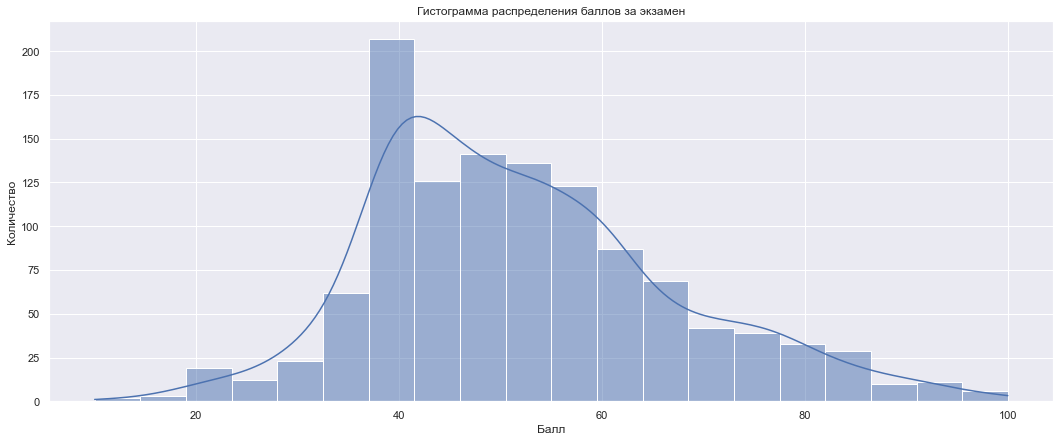

In [8]:
ax: Axes = sns.histplot(
    x=df['Балл'],
    bins=20,
    kde=True,
)
ax.set_title('Гистограмма распределения баллов за экзамен')
ax.set_xlabel('Балл')
_ = ax.set_ylabel('Количество')
# распределение близкое к нормальному

## 7.	Постройте оценку ядерной плотности распределению баллов за экзамен

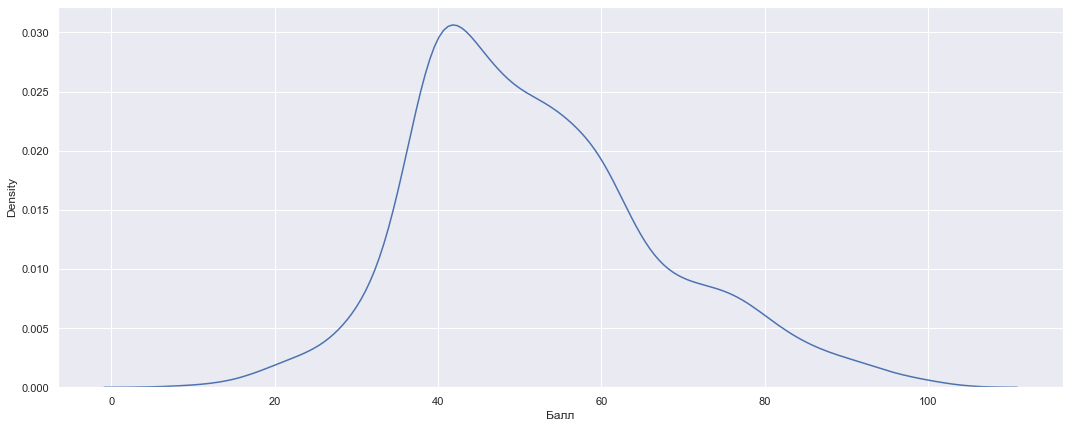

In [9]:
ax: Axes = sns.kdeplot(df['Балл'])

## 8.	Найдите процентное соотношение учащихся, сдавших экзамен на «отлично», «хорошо», «удовлетворительно», «неудовлетворительно». Сделайте графическое представление данного распределения

In [10]:
def exam_scale_score_mask(s: pd.Series, left: int = 0, right: int = 100):
    return (s >= left) & (s <= right)

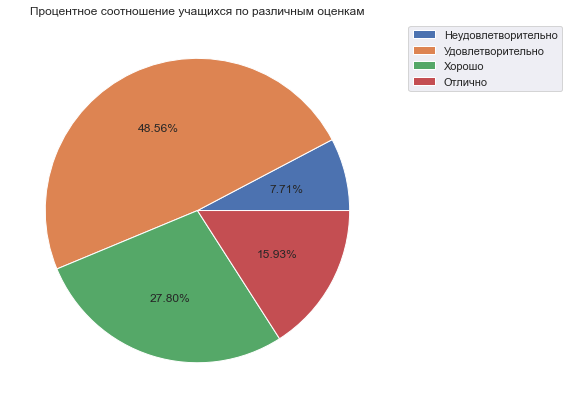

In [11]:
score = df['Балл']
s = pd.Series({
    'Неудовлетворительно': exam_scale_score_mask(score, left=0, right=35).sum(),
    'Удовлетворительно': exam_scale_score_mask(score, left=36, right=52).sum(),
    'Хорошо': exam_scale_score_mask(score, left=53, right=67).sum(),
    'Отлично': exam_scale_score_mask(score, left=68, right=100).sum(),
})
# noinspection PyRedeclaration
ax: Axes = s.plot.pie(
    autopct='%1.2f%%',
    title='Процентное соотношение учащихся по различным оценкам',
    legend=True,
    ylabel='',
    labels=None
)
_ = ax.legend(labels=s.index, loc='upper left', bbox_to_anchor=(1.04, 1))

## 9.	Постройте «ящиковые диаграммы», сравнивающие баллы учащихся, сдавших экзамен на «отлично», «хорошо», «удовлетворительно», «неудовлетворительно»

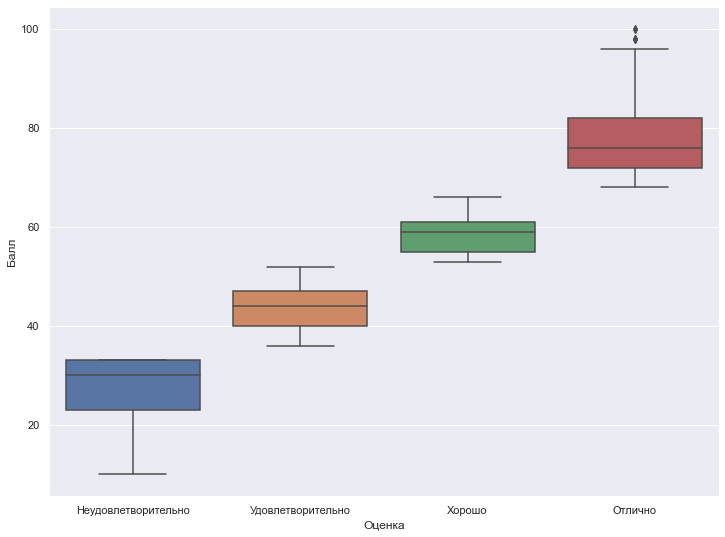

In [12]:
exam_scale_sample = pd.DataFrame({
    'Неудовлетворительно': score[exam_scale_score_mask(score, right=35)],
    'Удовлетворительно': score[exam_scale_score_mask(score, left=36, right=52)],
    'Хорошо': score[exam_scale_score_mask(score, left=53, right=67)],
    'Отлично': score[exam_scale_score_mask(score, left=68)],
})
ax: Axes = sns.boxplot(data=exam_scale_sample)
ax.figure.set_size_inches(12, 9)
ax.set_label('"Ящиковые диаграммы", сравнивающие баллы учащихся')
ax.set_xlabel('Оценка')
_ = ax.set_ylabel('Балл')

## 10.	Какое процентное соотношение юношей и девушек писало данный экзамен? Представьте графически

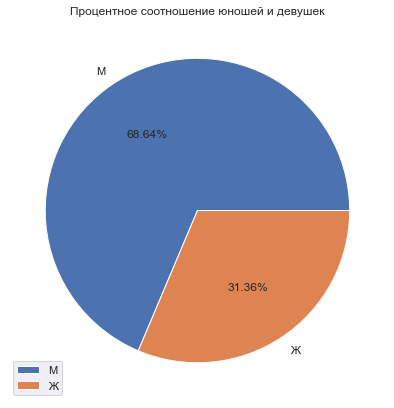

In [13]:
s: pd.Series = df['Пол'].value_counts()
_ = s.plot.pie(
    autopct='%1.2f%%',
    title='Процентное соотношение юношей и девушек',
    legend=True,
    ylabel='',
)

## 11.	Постройте диаграмму рассеивания, позволяющую увидеть средние баллы девушек и юношей

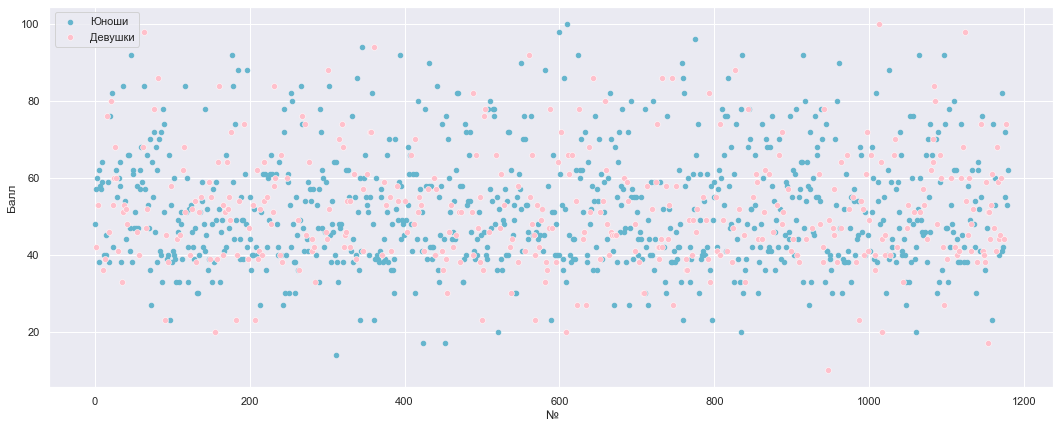

In [14]:
sample = df[['Балл']].sample(frac=1).reset_index(drop=True)
sample['№'] = sample.index

boys = sample[df['Пол'] == 'М']
girls = sample[df['Пол'] == 'Ж']

ax: Axes = boys.plot.scatter(
    x='№',
    y='Балл',
    color='c'
)
_ = sns.scatterplot(
    x='№',
    y='Балл',
    data=girls,
    ax=ax,
    color='pink'
)
ax.set_label('В примере бесполезная диаграмма, эта тоже')
_ = ax.legend(labels=['Юноши', 'Девушки'])

## 12.	Сколько школ (код ППЕ) принимало участие в экзамене?

In [15]:
print(f'В экзамене принимало участие {df["№ школы"].nunique()} школ')

В экзамене принимало участие 19 школ


## 13.	Постройте диаграмму, позволяющую сравнить средние баллы за экзамен по школам. Если какие-нибудь выбросы?

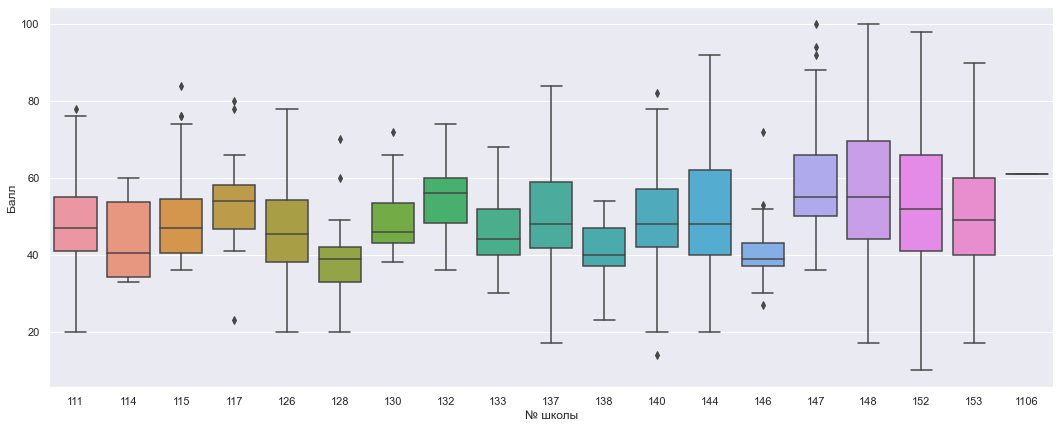

In [16]:
# Да, выбросы имеются, например в 146 школе сильно выделяется ученик, набравший 72 балла. В других школах также имеются выбросы
_ = sns.boxplot(
    data=df,
    x='№ школы',
    y='Балл'
)

# __Повышенной сложности:__

## 1.	Сколько всего заданий с кратким ответом? С развернутым ответом?

In [17]:
row = df.head(1)
pattern = re.compile(r'\d+\(\d+\)')

print(f'Всего {row["Задания с кратким ответом"].str.len().item()} заданий с кратким ответом')
print(f'Всего {row["Задания с развёрнутым ответом"].str.count(pattern).item()} заданий с развернутым ответом')

Всего 27 заданий с кратким ответом
Всего 5 заданий с развернутым ответом


## 2.	Пусть задания с кратким ответом будут задания типа В. Соответственно всего по экзамену вопросов класса В: В1 … Вк  Посчитайте процент выполненных и невыполненных заданий по каждому вопросу класса В. Постройте гистограмму, позволяю щую увидеть данное распределение. Какие есть выпады по данному распределению?

In [18]:
tasks_b = df["Задания с кратким ответом"].str.replace('0', '-').str.split('', expand=True)
tasks_b: pd.DataFrame = tasks_b.iloc[:, 1:-1]
tasks_b.columns = tasks_b.columns.map(lambda x: f'B{x}')
tasks_b.head()

,B1,B2,B3,B4,B5,B6,B7,B8,B9,B10,...,B18,B19,B20,B21,B22,B23,B24,B25,B26,B27
0,-,-,-,-,-,-,1,-,-,-,...,-,-,-,1,-,+,-,-,-,-
1,-,-,-,-,1,-,-,-,-,-,...,-,-,-,-,-,-,1,-,-,-
2,-,-,+,-,-,1,-,-,-,-,...,1,-,-,-,-,-,1,-,-,-
3,-,+,-,-,-,-,-,-,-,+,...,-,-,-,-,-,-,1,-,-,-
4,-,+,-,-,1,-,-,-,-,-,...,-,-,+,-,-,-,1,-,-,-


In [19]:
tasks_b[tasks_b != '-'] = 'Выполнено'
tasks_b[tasks_b == '-'] = 'Не выполнено'
tasks_b = tasks_b.melt(var_name='task', value_name='status')
tasks_b.head()

,task,status
0,B1,Не выполнено
1,B1,Не выполнено
2,B1,Не выполнено
3,B1,Не выполнено
4,B1,Не выполнено


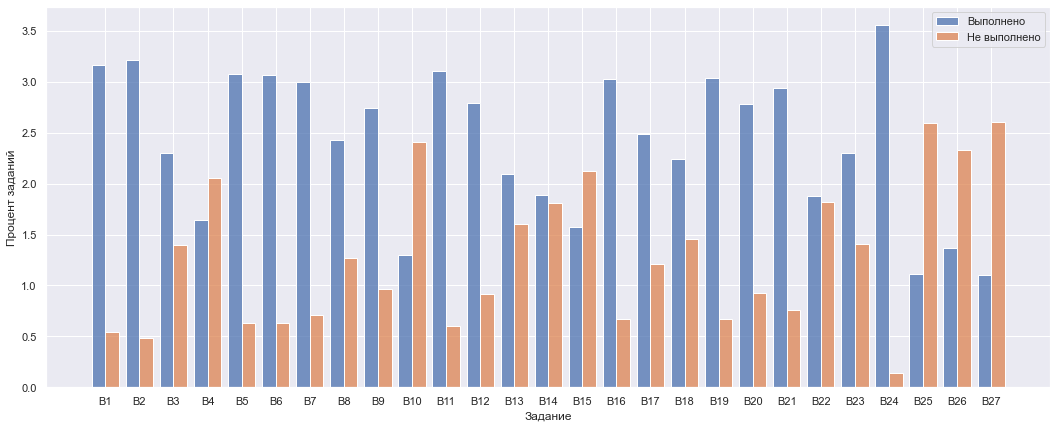

In [20]:
ax: Axes = sns.histplot(
    data=tasks_b,
    stat='percent',
    x='task',
    hue='status',
    hue_order=['Выполнено', 'Не выполнено'],
    multiple='dodge',
    shrink=.8,
)
ax.set_xlabel('Задание')
ax.set_ylabel('Процент заданий')
legend = ax.get_legend()
legend.set_title(None)

## 3.	Аналогично и с типом С (ответы с развернутым ответом)

In [21]:
pattern = re.compile(r'(\d+)\(\d+\)')
tasks_c = pd.DataFrame(df['Задания с развёрнутым ответом'].apply(pattern.findall).to_list())
n_fails = tasks_c.apply(lambda s: s.value_counts()['0']) / len(tasks_c) * 100
tasks_c = pd.DataFrame(data={'Не выполнено': n_fails, 'Выполнено': 100 - n_fails}, )
tasks_c.index = tasks_c.index.map(lambda x: f'C{x}')
tasks_c = tasks_c.melt(ignore_index=False).reset_index()
tasks_c

,index,variable,value
0,C0,Не выполнено,82.372881
1,C1,Не выполнено,61.779661
2,C2,Не выполнено,83.644068
3,C3,Не выполнено,76.610169
4,C4,Не выполнено,68.220339
5,C0,Выполнено,17.627119
6,C1,Выполнено,38.220339
7,C2,Выполнено,16.355932
8,C3,Выполнено,23.389831
9,C4,Выполнено,31.779661


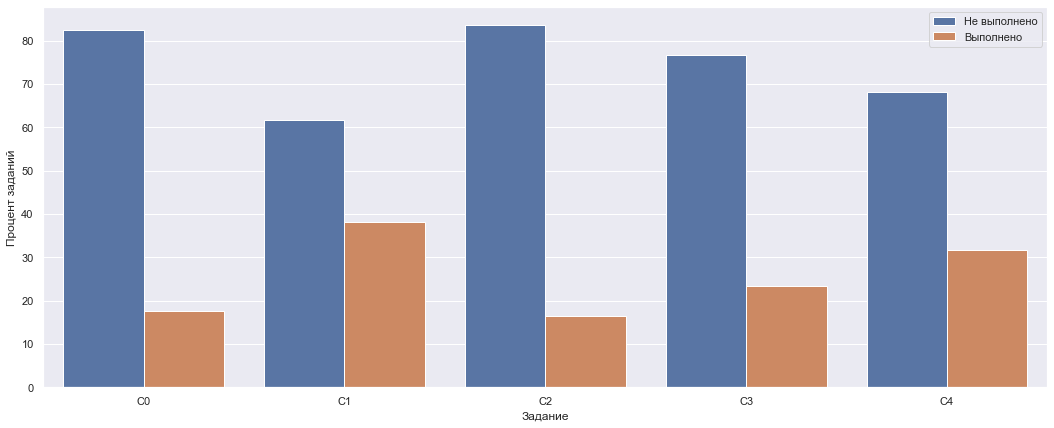

In [22]:
ax: Axes = sns.barplot(
    data=tasks_c,
    x='index',
    y='value',
    hue='variable'
)
ax.set_xlabel('Задание')
ax.set_ylabel('Процент заданий')
legend = ax.get_legend()
legend.set_title(None)

## 4.	Сделайте анализ по двум школам:
* А) по всем выполненным заданиям типа В
* Б) по заданиям типа С больше 50%
* В) по среднему балу юношей и девушек


In [33]:
df['№ школы'].value_counts().head()

148    214
152    170
140    135
153    129
137     72
Name: № школы, dtype: int64

In [24]:
first_school, second_school = 140, 153

In [25]:
def apply(df: pd.DataFrame) -> pd.DataFrame:
    tasks_b = df['Задания с кратким ответом'].str.replace('0', '-').str.split('', expand=True)
    tasks_b: pd.DataFrame = tasks_b.iloc[:, 1:-1]
    tasks_b.columns = tasks_b.columns.map(lambda x: f'B{x}')
    tasks_b[tasks_b != '-'] = 1
    tasks_b[tasks_b == '-'] = 0
    tasks_b = tasks_b.sum(axis=0) / len(df) * 100
    return pd.DataFrame({
        'school': f'Школа №{df["№ школы"].iloc[0]}',
        'task': tasks_b.index,
        'percent': tasks_b,
    }).reset_index(drop=True)

In [32]:
schools_sample = df[df['№ школы'].isin([first_school, second_school])]
g = schools_sample.groupby('№ школы').apply(apply)
g.head()

school task    percent
№ школы                              
140     0  Школа №140   C0   2.962963
        1  Школа №140   C1  17.037037
        2  Школа №140   C2   4.444444
        3  Школа №140   C3   0.000000
        4  Школа №140   C4   5.925926

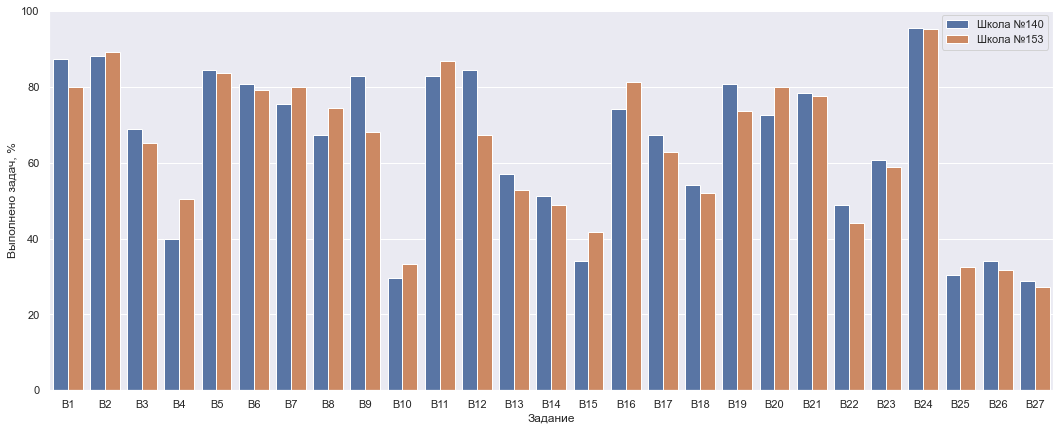

In [27]:
ax: Axes = sns.barplot(
    data=g,
    x='task',
    y='percent',
    hue='school'
)
ax.set_xlabel('Задание')
ax.set_ylabel('Выполнено задач, %')
_ = ax.legend(title=None)

### Б) по заданиям типа С больше 50%

In [28]:
repl_pattern = re.compile(r'(\d+)\((\d+)\)')


def apply(df: pd.DataFrame) -> pd.DataFrame:
    df_ = pd.DataFrame(df['Задания с развёрнутым ответом'].apply(
        lambda s: [
            1 if int(n) / int(limit) > 0.5 else 0
            for n, limit in repl_pattern.findall(s)
        ]
    ).to_list())
    s = df_.sum(axis=0) / len(df_) * 100
    return pd.DataFrame({
        'school': f'Школа №{df["№ школы"].iloc[0]}',
        'task': [f'C{i}' for i in range(len(s))],
        'percent': s,
    }).reset_index(drop=True)

In [29]:
g = schools_sample.groupby('№ школы').apply(apply)
g

school task    percent
№ школы                              
140     0  Школа №140   C0   2.962963
        1  Школа №140   C1  17.037037
        2  Школа №140   C2   4.444444
        3  Школа №140   C3   0.000000
        4  Школа №140   C4   5.925926
153     0  Школа №153   C0   5.426357
        1  Школа №153   C1  19.379845
        2  Школа №153   C2   8.527132
        3  Школа №153   C3   3.875969
        4  Школа №153   C4  13.178295

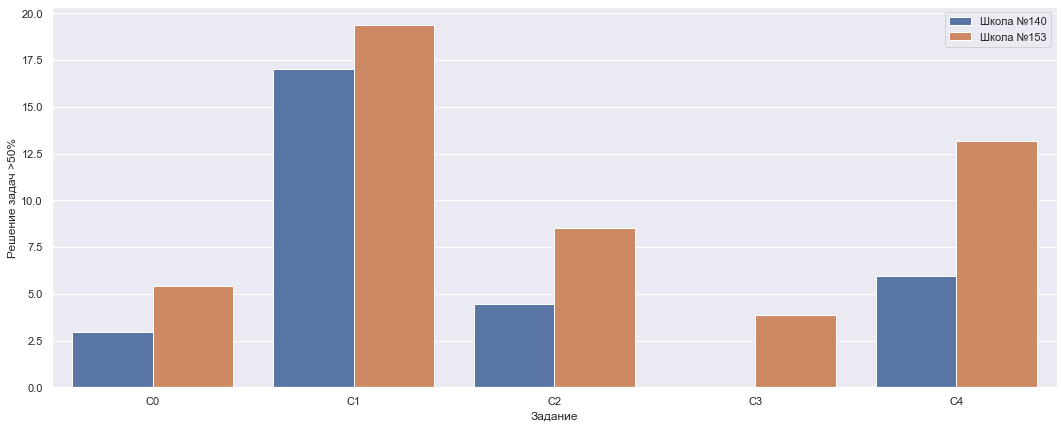

In [30]:
ax: Axes = sns.barplot(
    data=g,
    x='task',
    y='percent',
    hue='school'
)
ax.set_xlabel('Задание')
ax.set_ylabel('Решение задач >50%')
_ = ax.legend(title=None)

### в) по среднему балу юношей и девушек

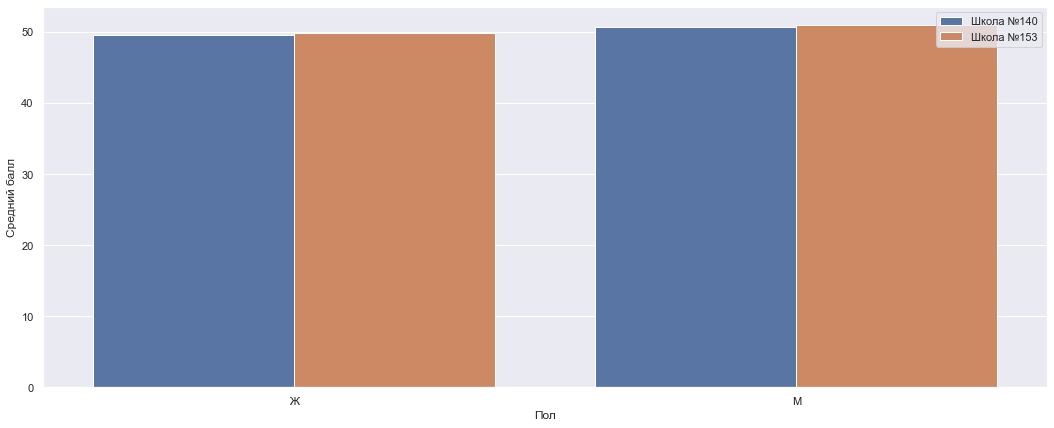

In [31]:
data = schools_sample.groupby(['№ школы', 'Пол'])['Балл'].mean().reset_index()
data['№ школы'] = data['№ школы'].map(lambda i: f'Школа №{i}')
ax: Axes = sns.barplot(
    data=data,
    x='Пол',
    y='Балл',
    hue='№ школы',
)
ax.set_xlabel('Пол')
ax.set_ylabel('Средний балл')
_ = ax.legend(title=None)